## Step 1 - Load Dataset

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

ERROR! Session/line number was not unique in database. History logging moved to new session 581


In [2]:
# Loading sales dataset
df = pd.read_csv("sales data-set.csv")
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


We can see from above that **"Date"** column is **object** type so it needs to be converted to **datetime**.

## Step 2 - Convert Date Column

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


We can see from above that **"Date"** column has been successfully converted to **datetime**.

In [6]:
# Setting 'Date' column as index
df = df.set_index('Date')

In [7]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


## Step 3 - Resample monthly

In [8]:
monthly = df['Weekly_Sales'].resample('M').sum()

## Step 4 - Check Trend & Seasonality

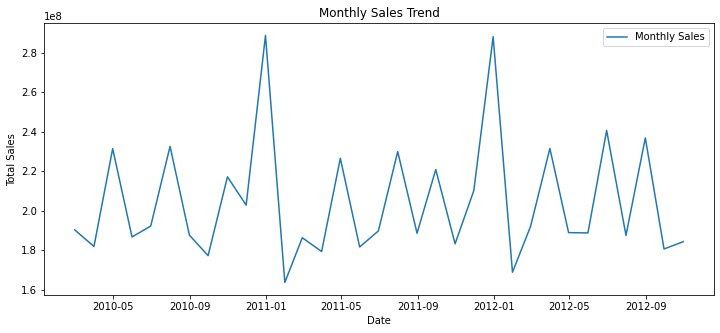

In [9]:
# Line plot of monthly sales trend
plt.figure(figsize=(12,5))
plt.plot(monthly, label='Monthly Sales')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

**Insights** :-

- Shows the overall movement of sales over time

- Helps visually identify:

    - Upward / downward trend

    - Peaks and dips

    - Possible seasonality

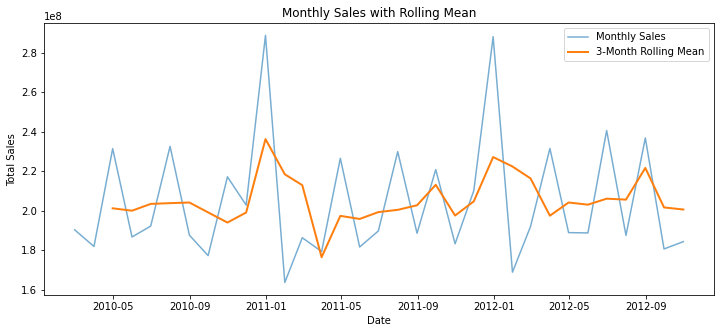

In [10]:
# Rolling mean smooths short-term fluctuations and highlights the long-term trend.
rolling_mean = monthly.rolling(window=3).mean()

plt.figure(figsize=(12,5))
plt.plot(monthly, label='Monthly Sales', alpha=0.6)
plt.plot(rolling_mean, label='3-Month Rolling Mean', linewidth=2)
plt.title("Monthly Sales with Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

**Insights** :-

- Reduces noise in the data

- Clearly highlights **underlying trend**

- Useful for **forecasting preparation**

Now we are going to do **Time Series Decomposition**. This splits the time series into :-

- Trend

- Seasonality

- Residual (noise)

In [11]:
# Import decomposition tool
from statsmodels.tsa.seasonal import seasonal_decompose

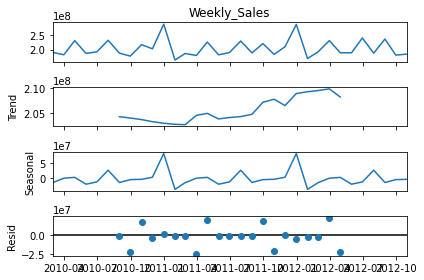

In [12]:
# Performing decomposition
decomposition = seasonal_decompose(monthly, model='additive')

decomposition.plot()
plt.show()

Interpreting Decomposition from the above plots:-
- **Trend** :-

    - Long-term direction of sales
    - Helps understand growth or decline

- **Seasonality**  :-

    - Repeating patterns (monthly / yearly)
    - Very common in retail data

- **Residual**  :-

    - Random fluctuations
    - Noise not explained by trend or seasonality

## Step 5 - Train Model (ARIMA)

**ARIMA** requires stationary data. 

We will calculate **p-value** in the next step.
If **p-value ≤ 0.05 → Stationary** else **Not stationary** then it needs **differencing**.

In [13]:
# Checking if data is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly)

print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -6.164473786749464
p-value: 7.044293727364691e-08


Since **p-value > 0.05** so data is **not stationary**, next we are going to make it **stationary** by doing **differencing**.

In [14]:
# Performing differencing
monthly_diff = monthly.diff().dropna()

In [15]:
# Checking p-value
result_new = adfuller(monthly_diff)

print("New p-value:", result_new[1])

New p-value: 0.019392965469167904


Now we can see that our new **p-value < 0.05** so data has become **stationary**.

Next, we are going to choose **ARIMA** parameters**(p, d, q)** as :-

- p = 1 → autoregressive

- d = 1 → differencing

- q = 1 → moving average

After that, we will proceed with training the **ARIMA** model.

In [16]:
# Setting each parameter as 1
p, d, q = 1, 1, 1

In [17]:
# Training the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly, order=(p, d, q))
model_fit = model.fit()

## Step 6 - Forecast Future Sales

In [18]:
forecast = model_fit.forecast(steps=12)
forecast

2012-11-30    2.004026e+08
2012-12-31    2.001428e+08
2013-01-31    2.001470e+08
2013-02-28    2.001469e+08
2013-03-31    2.001469e+08
2013-04-30    2.001469e+08
2013-05-31    2.001469e+08
2013-06-30    2.001469e+08
2013-07-31    2.001469e+08
2013-08-31    2.001469e+08
2013-09-30    2.001469e+08
2013-10-31    2.001469e+08
Freq: M, Name: predicted_mean, dtype: float64

## Step 7 - Plot forecast

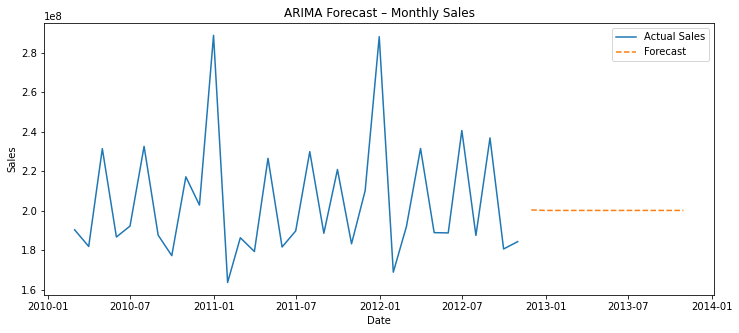

In [19]:
plt.figure(figsize=(12,5))
plt.plot(monthly, label='Actual Sales')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title("ARIMA Forecast – Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

## Step 8 - Final Insights 

- Sales data required **differencing** to achieve **stationarity**.
- **ARIMA** captured the **underlying trend** and short-term dependencies.
- **Forecast** provides a reasonable estimate for future monthly sales.
- Model can support **inventory planning** and **demand forecasting**.